# Лабораторная 1

Здесь мы проследуем по моему пути с теми косяками, которые я допустил (больших, которые меня очень затормозили, было целых два). Прошу прощения, если здесь будет вывод не со всех ячеек: у меня на данный момент минимум 9 юпитеров локально, и ещё по 4 разбросано по трём разным колабам, так что собирать их достаточно долго и мучительно.

Сразу извинюсь за то, что я отказался выступать (но выступать я все равно не буду). Те два косяка (второй по невнимательности, первый потому, что я, обвиасли, слишком умный) отбросили меня очень сильно; плюс то, что у меня изначально были плохие резы (ну и ограничения, которые я сам на себя наложил), меня побудили уделить лабе гораздо больше внимания, чем она, наверное, того заслуживала - учитывая, что бейслайн я побил ещё первым косячным вариантом, обязательную часть тоже сделал очень быстро, и ad-hoc фичи внедрить оказалось просто, мне стоило остановиться на плохих резах и забить. Вместо этого я перед сдачей лабы не спал двое суток и сидел, пытаясь вытащить резы в нормальную зону, и день перед сдачей я не помню совершенно (кодил я на автомате и лихорадочно); с использованными ресурсами же меня в итоге заблочили все три колаба ))))) Но я не победил даже тех кто выше меня, кто тоже делали LSTM (каким-то образом), так что какое мне выступление нафиг?

Ну в общем вот. Всё и все архитектуры я сюда включать очевидно не буду, только систематизированные файлы и ту deep learning архитектуру, в которой у меня получились наилучшие резы (это я скину отдельным файлом); с остальными обойдусь упоминаниями. Надеюсь, этого хватит - если нет, ну, ставь мне 6, мне этого хватит, я и так слишком много времени на лабу убил.

### EDA

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk

In [59]:
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [60]:
from plotly import graph_objs as go
from wordcloud import WordCloud, STOPWORDS
from tqdm import tqdm

In [4]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Здесь и далее та логика, которая у меня была в тот момент.

Посмотрим на тексты.

In [5]:
train = pd.read_parquet('data/train.parquet')
test = pd.read_parquet('data/test.parquet')

In [6]:
train.head()

Body  \
Id                                                            
34862324  Algorithmm:\r\n\r\n**input :** Graph G\r\n\r\n...   
47303682  While converting the data frame to HTML, Date ...   
46431243  <p>This should be an easy one, but somehow I c...   
45306324  <p>Let say I have a component in Angular 2 tha...   
49479547  <p>I'm setting a var using \n<code>set TEST_VA...   

                                                 Tags  \
Id                                                      
34862324           <java><algorithm><graph-algorithm>   
47303682                         <html><r><dataframe>   
46431243  <python><pandas><dataframe><pandas-groupby>   
45306324                  <angular><typescript><rxjs>   
49479547                     <c><windows><batch-file>   

                                                      Title  target  
Id                                                                   
34862324  I am implementing a Minimum Spanning Forrest a...       2  
47303682  R Studio: Date is getting converted to number,...       2  
46431243  Pandas - dataframe groupby - how to get sum of...       0  
45306324  Casting results from Observable.forkJoin to th...       0  
49479547  Environment variable set in batch file cannot ...       1

In [7]:
train = train.rename(columns={"Body": "text", "Tags": "tags", "Title": "title", "target": "class"})

In [8]:
for title in train.title[:10]:
    print(title)

I am implementing a Minimum Spanning Forrest algorihm in java. But stuck on how to write a loop
R Studio: Date is getting converted to number, while making html of datafrane
Pandas - dataframe groupby - how to get sum of multiple columns
Casting results from Observable.forkJoin to their respective types in Angular 2
Environment variable set in batch file cannot be accessed in the C code compiled by the file
How can i get how to scrolled it is in uicollectionView
Angular2 TypeScript Directive error TS2345
Can't install StarUML in Ubuntu 16.04
How to set the path of the folder to be created in uwp in C#
Turn on/off gps using button without getting into setting menu


In [9]:
for body in train.text[:5]:
    print(body)
    print('---------------')

Algorithmm:

**input :** Graph G

**output:** Set of MSTs T

**begin**

T=null;
E=G.Edges;

for all vertices in G,
Create a tree t having single vertex b

add t to T

end for

     repeat
        Find an edge e ∈ E having minimum weight
        such that one end belongs to t ∈ T and the other
        end does not belongs to any of the trees in T
        Add e to t
      until e = NULL

I'm stuck on the logic for the highlighted block.
I've used simple objects for vertex,edge and tree. And for their sets, used array of Objects.



---------------
While converting the data frame to HTML, Date is getting converted to a number. 

How to keep it date only?
---------------
<p>This should be an easy one, but somehow I couldn't find a solution that works.</p>

<p>I have a pandas dataframe which looks like this:</p>

<pre><code>index col1   col2   col3   col4   col5
0     a      c      1      2      f 
1     a      c      1      2      f
2     a      d      1      2      f
3     b      d      1

In [10]:
train = train.reset_index(drop=True)

In [11]:
train.head()

text  \
0  Algorithmm:\r\n\r\n**input :** Graph G\r\n\r\n...   
1  While converting the data frame to HTML, Date ...   
2  <p>This should be an easy one, but somehow I c...   
3  <p>Let say I have a component in Angular 2 tha...   
4  <p>I'm setting a var using \n<code>set TEST_VA...   

                                          tags  \
0           <java><algorithm><graph-algorithm>   
1                         <html><r><dataframe>   
2  <python><pandas><dataframe><pandas-groupby>   
3                  <angular><typescript><rxjs>   
4                     <c><windows><batch-file>   

                                               title  class  
0  I am implementing a Minimum Spanning Forrest a...      2  
1  R Studio: Date is getting converted to number,...      2  
2  Pandas - dataframe groupby - how to get sum of...      0  
3  Casting results from Observable.forkJoin to th...      0  
4  Environment variable set in batch file cannot ...      1

In [12]:
train.isna().sum() # Checking for nan Values

text     0
tags     0
title    0
class    0
dtype: int64

In [13]:
train.groupby('class').count()['text']

class
0    16000
1    16000
2    16000
Name: text, dtype: int64

Видим, что данные сбалансированы :) Проверим, насколько длины (непредобработанных) текстов соответствуют качеству постов. (но сначала для простого варианта просто объединим заголовки с текстами)

In [14]:
train['text'] = train['title'] + ' ' + train['text']
train.drop(['title'], axis=1, inplace=True)

In [15]:
train.head()

text  \
0  I am implementing a Minimum Spanning Forrest a...   
1  R Studio: Date is getting converted to number,...   
2  Pandas - dataframe groupby - how to get sum of...   
3  Casting results from Observable.forkJoin to th...   
4  Environment variable set in batch file cannot ...   

                                          tags  class  
0           <java><algorithm><graph-algorithm>      2  
1                         <html><r><dataframe>      2  
2  <python><pandas><dataframe><pandas-groupby>      0  
3                  <angular><typescript><rxjs>      0  
4                     <c><windows><batch-file>      1

In [16]:
hq = train[train['class']==0]['text'].str.split().map(lambda x: min(len(x), 500))
lq_close = train[train['class']==1]['text'].str.split().map(lambda x: min(len(x), 500))
lq_edit = train[train['class']==2]['text'].str.split().map(lambda x: min(len(x), 500))

In [17]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=hq, histfunc='avg', name="HQ", opacity=0.6, histnorm='probability density'))
fig.add_trace(go.Histogram(x=lq_close, histfunc='avg', name="LQ_CLOSE", opacity=0.6, histnorm='probability density'))
fig.add_trace(go.Histogram(x=lq_edit, histfunc='avg', name="LQ_EDIT", opacity=0.6, histnorm='probability density'))
fig.show()

Здесь график по какой-то неведомой причине из кагла локально не перешёл даже при повторном запуске (просто отказался строиться), но выглядит оно примерно вот так:

![title](img/histogram.png)

Мы видим, что более длинные посты тяготеют к высокому качеству. Перед предыдущими шагами попробуем провести предобработку.

Мы видим, что в постах много разметки. StackOverflow позволяет использовать разметку для улучшения качества постов, чтобы делать их более презентабельными, так что её наличие или отсутствие может говорить о качестве. Используем её рудиментарно: исключая её из текста, будем фиксировать, изменилась ли длина строки; более того, отметим так же, был ли в каждом тексте код (блоки < code >: устраняем всё, что между ними) (а заодно подчистим множественные пробелы, \n и так далее)

**Примечание в ретроспективе**: моя первая ошибка - не попробовать более простую предобработку, вообще забив на разметку и лемматизацию и просто убрать пунктуацию. Следующие два дня я провёл просто матерясь и не понимая, как у людей за 90%, когда я даже не могу попасть в 80, хотя вроде всё правильно сделал.

И да, по логике вещей НЕОБХОДИМО убирать разметку, в противном случае если просто вычистить пунктуацию появляются такие замечательные слова, как, например, dhello (из < d>Hello! , пробела нет, просто иначе юпитер не отображает), которых НЕТ в эмбеддингах, и таких внесловарных слов просто огромное количество. А поди ж ты. 

In [18]:
def remove_markdown(text):
    no_multiwhite = re.sub(r'\s+', ' ', text.replace('\n', ' '))
    no_code = re.sub(r'<code>.+?<\/code>', '', no_multiwhite)
    no_markdown = re.sub(r'<\/?.+?>', '', no_code).strip()
    has_code = min(1, len(no_multiwhite) - len(no_code))
    has_markdown = min(1, len(no_code) - len(no_markdown))
    return no_markdown, has_code, has_markdown

In [19]:
print(train.text[2])

Pandas - dataframe groupby - how to get sum of multiple columns <p>This should be an easy one, but somehow I couldn't find a solution that works.</p>

<p>I have a pandas dataframe which looks like this:</p>

<pre><code>index col1   col2   col3   col4   col5
0     a      c      1      2      f 
1     a      c      1      2      f
2     a      d      1      2      f
3     b      d      1      2      g
4     b      e      1      2      g
5     b      e      1      2      g
</code></pre>

<p><strong>I want to group by col1 and col2 and get the <code>sum()</code> of col3 and col4.</strong> <code>Col5</code> can be dropped, since the data can not be aggregated.</p>

<p>Here is how the output should look like. I am interested in having both <code>col3</code> and <code>col4</code> in the resulting dataframe. It doesn't really matter if <code>col1</code> and <code>col2</code> are part of the index or not.</p>

<pre><code>index col1   col2   col3   col4   
0     a      c      2      4          


In [20]:
remove_markdown(train.text[2])

("Pandas - dataframe groupby - how to get sum of multiple columns This should be an easy one, but somehow I couldn't find a solution that works. I have a pandas dataframe which looks like this:  I want to group by col1 and col2 and get the  of col3 and col4.  can be dropped, since the data can not be aggregated. Here is how the output should look like. I am interested in having both  and  in the resulting dataframe. It doesn't really matter if  and  are part of the index or not.  Here is what I tried:  That however only returns the aggregated results of . I am lost here. Every example I found only aggregates one column, where the issue obviously doesn't occur.",
 1,
 1)

In [21]:
train_processed = []
for text in tqdm(train.text):
    row = {'text': '', 'has_code': 0, 'has_markdown': 0, 'length': 0}
    row['text'], row['has_code'], row['has_markdown'] = remove_markdown(text)
    row['length'] = len(row['text'])
    train_processed.append(row)

100%|██████████| 48000/48000 [00:02<00:00, 23340.50it/s]


In [22]:
train_processed = pd.DataFrame(train_processed)
train_processed['tags'] = train['tags']
train_processed['class'] = train['class']

In [23]:
# Нормализуем длины текстов
train_processed['length'] = (train_processed['length']-train_processed['length'].mean())/train_processed['length'].std()

In [24]:
train_processed.head()

text  has_code  has_markdown  \
0  I am implementing a Minimum Spanning Forrest a...         0             1   
1  R Studio: Date is getting converted to number,...         0             0   
2  Pandas - dataframe groupby - how to get sum of...         1             1   
3  Casting results from Observable.forkJoin to th...         1             1   
4  Environment variable set in batch file cannot ...         1             1   

     length                                         tags  class  
0  0.027771           <java><algorithm><graph-algorithm>      2  
1 -0.512625                         <html><r><dataframe>      2  
2  0.151526  <python><pandas><dataframe><pandas-groupby>      0  
3  0.301407                  <angular><typescript><rxjs>      0  
4 -0.461748                     <c><windows><batch-file>      1

In [25]:
len(train_processed[train_processed['has_code'] == train_processed['has_markdown']])

29570

Более чем в трети текстов присутствие разметки не предполагает присутствие кода; имеет смысл оставить и то, и другое.

Далее проведём базовую предобработку текста: lowercase, пунктуация, стоп-слова, лемматизация, и сохраним промежуточный результат.

In [26]:
lemmatizer = WordNetLemmatizer()
exclude = set(string.punctuation)
stop = stopwords.words('english')

In [27]:
def preprocess(text):
    text = ''.join(ch for ch in text.lower() if ch.isalpha() or ch == ' ')
    lemmatized = [lemmatizer.lemmatize(word) for word in text.split()]
    preprocessed = ' '.join(lemma for lemma in lemmatized if lemma not in stop)
    return preprocessed

In [28]:
preprocess(train_processed['text'][2])

'panda dataframe groupby get sum multiple column easy one somehow couldnt find solution work panda dataframe look like want group col col get col col dropped since data aggregated output look like interested resulting dataframe doesnt really matter part index tried however return aggregated result lost every example found aggregate one column issue obviously doesnt occur'

In [29]:
train_processed['text'] = train_processed['text'].map(preprocess)

In [30]:
train_processed.head()

text  has_code  has_markdown  \
0  implementing minimum spanning forrest algorihm...         0             1   
1  r studio date getting converted number making ...         0             0   
2  panda dataframe groupby get sum multiple colum...         1             1   
3  casting result observableforkjoin respective t...         1             1   
4  environment variable set batch file cannot acc...         1             1   

     length                                         tags  class  
0  0.027771           <java><algorithm><graph-algorithm>      2  
1 -0.512625                         <html><r><dataframe>      2  
2  0.151526  <python><pandas><dataframe><pandas-groupby>      0  
3  0.301407                  <angular><typescript><rxjs>      0  
4 -0.461748                     <c><windows><batch-file>      1

In [31]:
train_processed.to_csv('data/train_texts.csv', index=False)

# EDA предобработанных текстов

In [32]:
train = pd.read_csv('data/train_texts.csv')

In [33]:
train.head()

text  has_code  has_markdown  \
0  implementing minimum spanning forrest algorihm...         0             1   
1  r studio date getting converted number making ...         0             0   
2  panda dataframe groupby get sum multiple colum...         1             1   
3  casting result observableforkjoin respective t...         1             1   
4  environment variable set batch file cannot acc...         1             1   

     length                                         tags  class  
0  0.027771           <java><algorithm><graph-algorithm>      2  
1 -0.512625                         <html><r><dataframe>      2  
2  0.151526  <python><pandas><dataframe><pandas-groupby>      0  
3  0.301407                  <angular><typescript><rxjs>      0  
4 -0.461748                     <c><windows><batch-file>      1

Посмотрим облака слов для текстов разного качества.

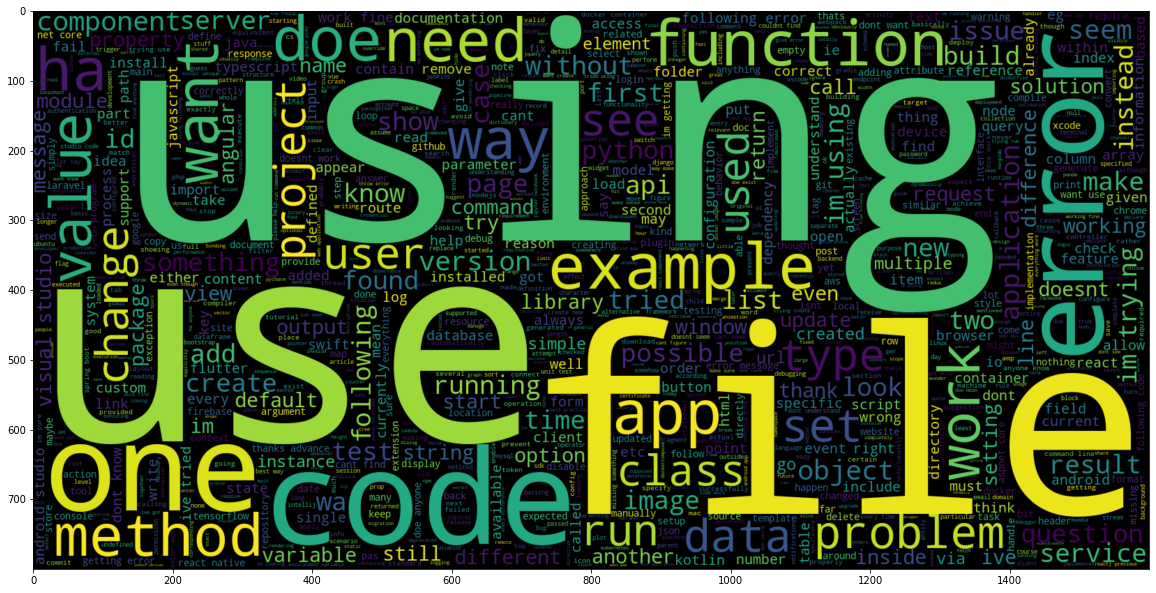

In [34]:
plt.figure(figsize = (20,20)) # HQ
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(train[train['class'] == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

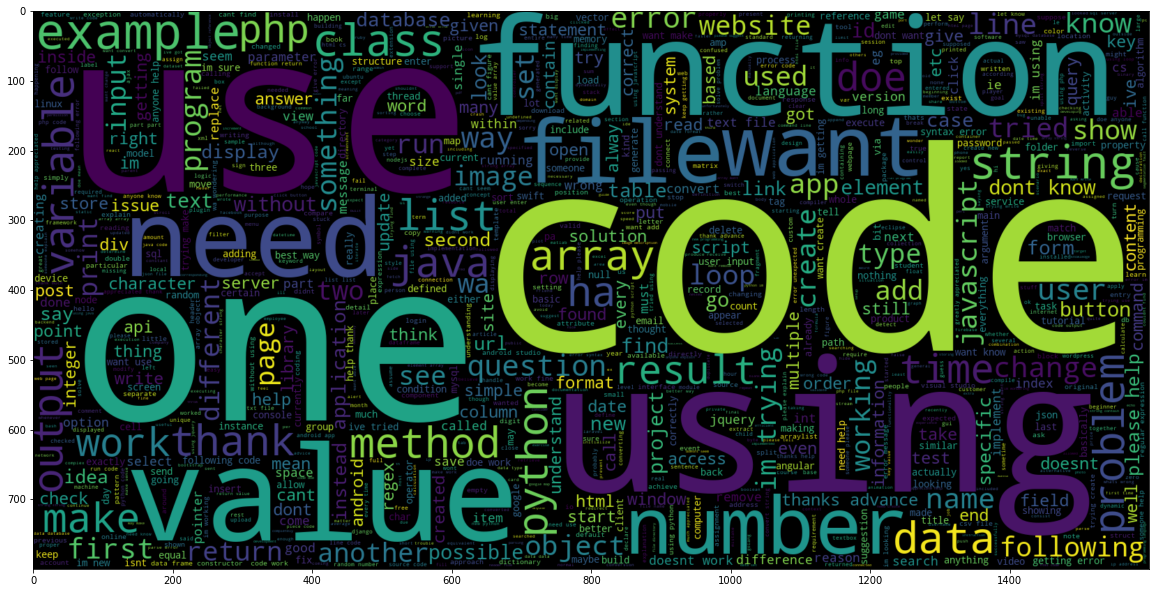

In [35]:
plt.figure(figsize = (20,20)) # LQ_CLOSE
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(train[train['class'] == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

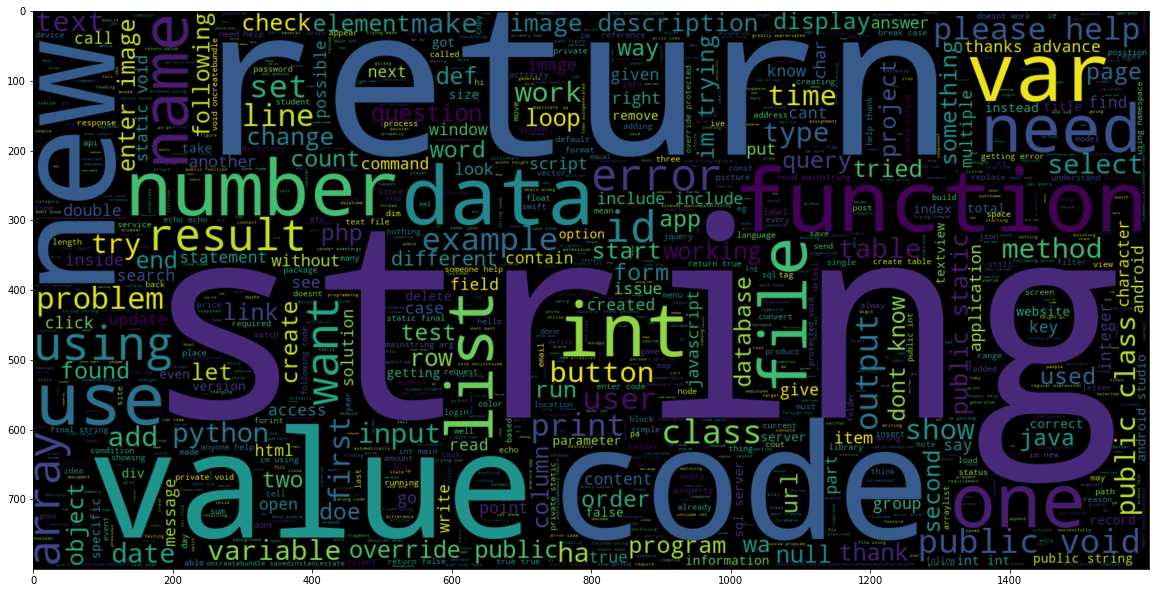

In [36]:
plt.figure(figsize = (20,20)) # LQ_EDIT
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(train[train['class'] == 2].text))
plt.imshow(wc , interpolation = 'bilinear')

## Ngram analysis

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

In [38]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

### Unigrams

<AxesSubplot:>

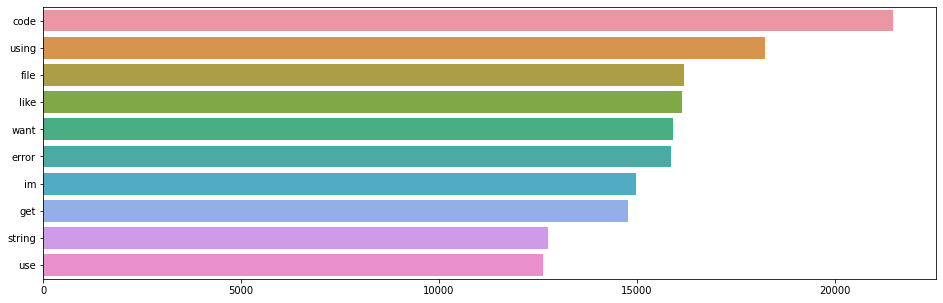

In [39]:
plt.figure(figsize = (16,5))
most_common_uni = get_top_text_ngrams(train.text,10,1)
most_common_uni = dict(most_common_uni)
sns.set_palette("husl")
sns.barplot(x=list(most_common_uni.values()),y=list(most_common_uni.keys()))

### Bigrams

<AxesSubplot:>

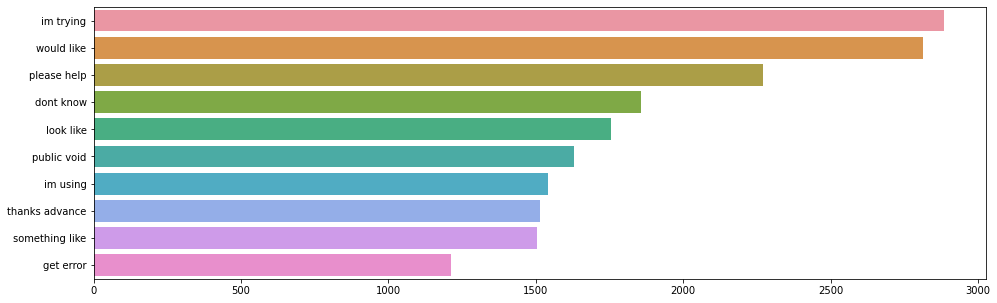

In [40]:
plt.figure(figsize = (16,5))
most_common_bi = get_top_text_ngrams(train.text,10,2)
most_common_bi = dict(most_common_bi)
sns.set_palette("husl")
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

### Trigrams

<AxesSubplot:>

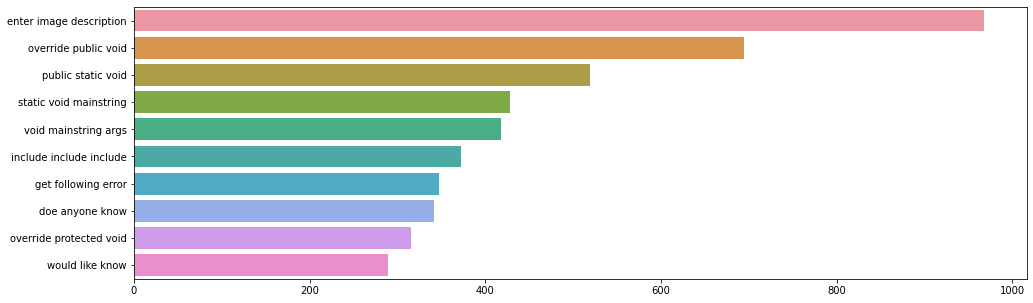

In [41]:
plt.figure(figsize = (16,5))
most_common_bi = get_top_text_ngrams(train.text,10,3)
most_common_bi = dict(most_common_bi)
sns.set_palette("husl")
sns.barplot(x=list(most_common_bi.values()),y=list(most_common_bi.keys()))

Для удобства соберём всю предобработку датафрейма в один пайплайн.

In [43]:
test.head()

Body  \
Id                                                            
46785369  I was given a decision tree with sample data i...   
38908667  <p>I am moving a test application over to Xcod...   
44703012  <p>I would like to be able to perform linting ...   
34910435  <p>I’m using <a href="https://github.com/ftlab...   
51632121  I have some 5 Test cases and I want them to ke...   

                                                       Tags  \
Id                                                            
46785369  <math><machine-learning><artificial-intelligen...   
38908667              <ios><swift><swift3><xcode8><nserror>   
44703012                        <jenkins><jenkins-pipeline>   
34910435  <javascript><css><mobile-safari><fastclick.js>...   
51632121         <android><testing><appium><katalon-studio>   

                                                      Title  
Id                                                           
46785369  Desecion trees ended up with same given tree a...  
38908667         Value of type 'Error' has no member 'code'  
44703012  How do I lint Jenkins pipelines from the comma...  
34910435  Is there a way to prevent fastclick from firin...  
51632121          How to loop test cases in katalon Studio?

In [47]:
def preprocess_frame(df, has_class=False):
    df = df.reset_index(drop=False)
    df = df.rename(columns={'Body': 'text', 'Tags': 'tags', 'Title': 'title'})
    df['text'] = df['title'] + ' ' + df['text']
    df.drop(['title'], axis=1, inplace=True)
    df_processed = []
    for text in df.text:
        row = {'text': '', 'has_code': 0, 'has_markdown': 0, 'length': 0}
        row['text'], row['has_code'], row['has_markdown'] = remove_markdown(text)
        row['length'] = len(row['text'])
        df_processed.append(row)
    df_processed = pd.DataFrame(df_processed)
    # Нормализуем длины текстов
    df_processed['length'] = (df_processed['length']-df_processed['length'].mean())/df_processed['length'].std()
    df_processed['tags'] = df['tags']
    if has_class:
        df_processed['class'] = df['class']
    df_processed['text'] = df_processed['text'].map(preprocess)
    df_processed['id'] = df['Id']
    return df_processed

In [48]:
test_processed = preprocess_frame(test)

In [49]:
test_processed.to_csv('data/test_texts.csv', index=False)

In [50]:
test_processed.head()

text  has_code  has_markdown  \
0  desecion tree ended given tree gainsplit compu...         0             1   
1  value type error ha member code moving test ap...         1             1   
2  lint jenkins pipeline command line would like ...         0             1   
3  way prevent fastclick firing active state scro...         1             1   
4  loop test case katalon studio test case want k...         0             0   

     length                                               tags        id  
0 -0.300980  <math><machine-learning><artificial-intelligen...  46785369  
1 -0.330390              <ios><swift><swift3><xcode8><nserror>  38908667  
2 -0.478665                        <jenkins><jenkins-pipeline>  44703012  
3  0.001697  <javascript><css><mobile-safari><fastclick.js>...  34910435  
4 -0.450481         <android><testing><appium><katalon-studio>  51632121

Здесь EDA закончился и началась боль. Для боли всё таки прошу обратиться к ноутбуку 2. Sklearn.ipynb. Если я перенесу код оттуда сюда, вывод ячеек не сохранится, данных в том формате для исполнения заново у меня уже не осталось, а проделывать с нуля все шаги мне просто больно. (это общая тема для всех юпитеров)